# Calgary Crime Statistics: Project Overview 

To analyze the the current (2021) crime rate of Calgary. 

By going through the EDA process I hope to find insights that I wouldn't normally find on the
Calgary open database.

<br>

## Code and Resources Used

**Python Version:** Python 3.9.7

**Packages:** sodapy, pandas, matplotlib, plotly

**Dataset:** [https://data.calgary.ca/Health-and-Safety/Community-Crime-Statistics/78gh-n26t](https://data.calgary.ca/Health-and-Safety/Community-Crime-Statistics/78gh-n26t)

**Scraper Socrata:** [https://dev.socrata.com/foundry/data.calgary.ca/78gh-n26t](https://dev.socrata.com/foundry/data.calgary.ca/78gh-n26t)

**Map Plotly:** [https://plotly.com/python/scattermapbox/](https://plotly.com/python/scattermapbox/)

In [2]:
from sodapy import Socrata
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Webscraping 

The Socrata API was used to query the Calgary Crime Statistics for 2021. 

After converting our results into a data frame, we get the following columns:
- sector
- community_name
- category
- crime_count
- resident_count
- date
- year
- month
- long
- lat
- id
- community_center_point

In [20]:
socrata_domain = "data.calgary.ca"              #<--- Open database
socrata_identifier = "78gh-n26t"                #<--- Calgary Crime Stats Dataset
app_token = 'hTDCmDPAMga7ZzENEaEhREweG'         #<--- Removes throttle limit
map_token = 'pk.eyJ1Ijoic3dhaW5sYW5jYXN0ZXIiLCJhIjoiY2t2MnY0eGp5MGZobTJucDZ1MGczN3RoZiJ9.rb_P-r0XJgLxmnq6pjGVig' #<--- plotly map token
query_2021 = "year = '2021'"

client = Socrata(socrata_domain, app_token)
results = client.get_all(socrata_identifier, where = query_2021) 

df_calgary = pd.DataFrame.from_records(results)
df_calgary.tail()

,sector,community_name,category,crime_count,resident_count,date,year,month,long,lat,id,community_center_point
8025,CENTRE,BANKVIEW,Break & Enter - Other Premises,1,NaN,2021-02-01T00:00:00.000,2021,FEB,-114.1004892,51.03413124,2021-FEB-BANKVIEW-Break & Enter - Other Premises,"{'type': 'Point', 'coordinates': [-114.1004892..."
8026,CENTRE,RENFREW,Violence Other (Non-domestic),1,NaN,2021-03-01T00:00:00.000,2021,MAR,-114.0391758,51.05965845,2021-MAR-RENFREW-Violence Other (Non-domestic),"{'type': 'Point', 'coordinates': [-114.0391758..."
8027,EAST,DOVER,Break & Enter - Commercial,1,NaN,2021-01-01T00:00:00.000,2021,JAN,-113.9931505,51.02246299,2021-JAN-DOVER-Break & Enter - Commercial,"{'type': 'Point', 'coordinates': [-113.9931505..."
8028,NORTH,COVENTRY HILLS,Break & Enter - Commercial,1,NaN,2021-01-01T00:00:00.000,2021,JAN,-114.0531434,51.16490633,2021-JAN-COVENTRY HILLS-Break & Enter - Commer...,"{'type': 'Point', 'coordinates': [-114.0531434..."
8029,NORTHWEST,ROCKY RIDGE,Break & Enter - Dwelling,1,NaN,2021-02-01T00:00:00.000,2021,FEB,-114.245899,51.14421495,2021-FEB-ROCKY RIDGE-Break & Enter - Dwelling,"{'type': 'Point', 'coordinates': [-114.245899,..."


## Data Cleaning

The following changes were made to the scraped data:

- Removed the community_center_point column
- changed the columns to the correct column data types
  - crime_count to numeric
  - resident_count to numeric
  - long to numeric
  - lat to numeric
  - date to to datetime YYYY-MM

There were 0 duplicated rows.

There were 61 rows with NA values, but I've decided to leave them in since

I won't be implementing any models that would  be affected by NA values.

In [21]:
### Clean Data ###
df_calgary = df_calgary.iloc[:,0:11]            #<--- I only need the first 11 columns
df_calgary.dtypes                               #<--- Check data types for each column

sector            object
community_name    object
category          object
crime_count       object
resident_count    object
date              object
year              object
month             object
long              object
lat               object
id                object
dtype: object

In [22]:
df_calgary['crime_count'] = pd.to_numeric(df_calgary['crime_count'])
df_calgary['resident_count'] = pd.to_numeric(df_calgary['resident_count'])
df_calgary['long'] = pd.to_numeric(df_calgary['long'])
df_calgary['lat'] = pd.to_numeric(df_calgary['lat'])

df_calgary['date'] = df_calgary['date'].str[:7]
df_calgary['date'] = pd.to_datetime(df_calgary['date'])

In [23]:
df_calgary.dtypes 

sector                    object
community_name            object
category                  object
crime_count                int64
resident_count           float64
date              datetime64[ns]
year                      object
month                     object
long                     float64
lat                      float64
id                        object
dtype: object

In [24]:
df_calgary.duplicated().sum()

0

In [25]:
df_calgary[df_calgary.isnull().any(axis=1)]

,sector,community_name,category,crime_count,resident_count,date,year,month,long,lat,id
623,NaN,SCARBORO/SUNALTA WEST,Break & Enter - Commercial,1,NaN,2021-04-01,2021,APR,NaN,NaN,2021-APR-SCARBORO/SUNALTA WEST-Break & Enter -...
624,NaN,SCARBORO/SUNALTA WEST,Theft OF Vehicle,1,NaN,2021-04-01,2021,APR,NaN,NaN,2021-APR-SCARBORO/SUNALTA WEST-Theft OF Vehicle
867,NaN,ALPINE PARK,Theft FROM Vehicle,1,NaN,2021-02-01,2021,FEB,NaN,NaN,2021-FEB-ALPINE PARK-Theft FROM Vehicle
4222,NaN,TNPS,Violence Other (Non-domestic),1,NaN,2021-07-01,2021,JUL,NaN,NaN,2021-JUL-TNPS-Violence Other (Non-domestic)
4401,NaN,SCARBORO/SUNALTA WEST,Break & Enter - Commercial,1,NaN,2021-01-01,2021,JAN,NaN,NaN,2021-JAN-SCARBORO/SUNALTA WEST-Break & Enter -...
...,...,...,...,...,...,...,...,...,...,...,...
8025,CENTRE,BANKVIEW,Break & Enter - Other Premises,1,NaN,2021-02-01,2021,FEB,-114.100489,51.034131,2021-FEB-BANKVIEW-Break & Enter - Other Premises
8026,CENTRE,RENFREW,Violence Other (Non-domestic),1,NaN,2021-03-01,2021,MAR,-114.039176,51.059658,2021-MAR-RENFREW-Violence Other (Non-domestic)
8027,EAST,DOVER,Break & Enter - Commercial,1,NaN,2021-01-01,2021,JAN,-113.993150,51.022463,2021-JAN-DOVER-Break & Enter - Commercial
8028,NORTH,COVENTRY HILLS,Break & Enter - Commercial,1,NaN,2021-01-01,2021,JAN,-114.053143,51.164906,2021-JAN-COVENTRY HILLS-Break & Enter - Commer...


## Exploratory Data Analysis

In this EDA I wanted to find out:

- Breakdown of crime count by crime type
- Breakdown of crime count by sector
- Breakdown of crime count by community
- Timeline of crimes 
- Geo graph of crimes

In [26]:
df_calgary.describe() #ignore long and lat

,crime_count,resident_count,long,lat
count,8030.000000,7969.000000,8017.000000,8017.000000
mean,2.549440,6464.784917,-114.059105,51.044834
std,3.225797,5451.831662,0.078177,0.070050
min,1.000000,0.000000,-114.282741,50.856236
25%,1.000000,2263.000000,-114.112247,51.011939
50%,2.000000,5904.000000,-114.065520,51.049237
75%,3.000000,9162.000000,-113.993151,51.089901
max,58.000000,25710.000000,-113.871525,51.197958


In [27]:
crimes_charged = df_calgary['crime_count'].sum()
print("In 2021, the number of crimes charged in Calgary is:", crimes_charged,)

In 2021, the number of crimes charged in Calgary is: 20472


### Count of Crime Type

Despite hearing the many pharmacy robberies in Calgary on social media,

the category itself ranks the lowest in terms of crime count. 

Theft involving a vehicle (Theft from Vehicle and Theft of Vehicle)

makes up the majority of crime counts in Calgary.

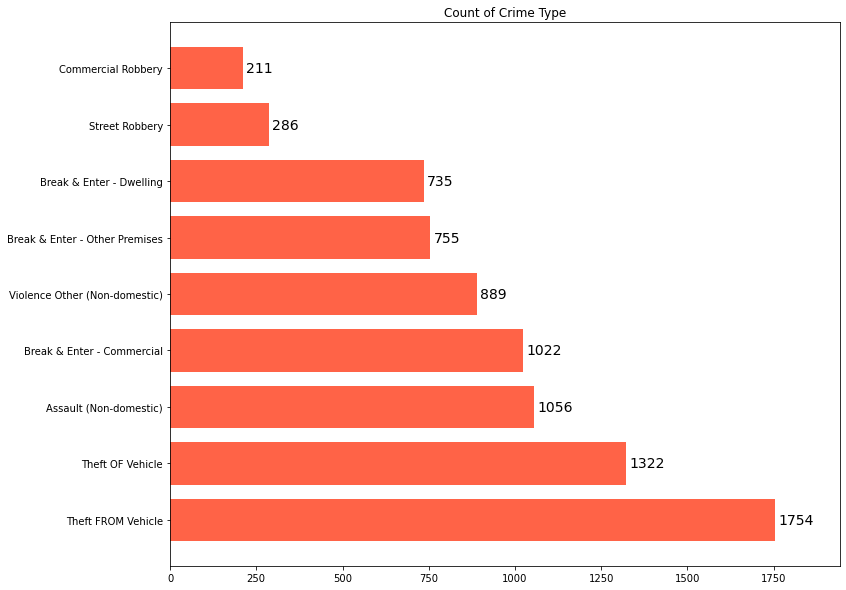

In [28]:
#Types of Crime
y0 = df_calgary['category'].value_counts()
fig, ax = plt.subplots(figsize=(12,10))
ax.barh(y0.index, y0, height=0.75, color="tomato")
plt.title('Count of Crime Type')
_, xmax = plt.xlim()
plt.xlim(0, xmax+100)

for i, v in enumerate(y):                   #<--- Add data labels
    ax.text(v + 10, i, str(v), color='black', fontsize=14, ha='left', va='center')

### Vehicle related crimes by Sector

The Centre sector has the most vehicle related crimes for 2021.

In [29]:
vehicle_crime = df_calgary[(df_calgary['category'] == 'Theft FROM Vehicle') | (df_calgary['category'] == 'Theft OF Vehicle')]

In [30]:
vehicle_crime['sector'].value_counts()

CENTRE       761
NORTHEAST    582
SOUTH        449
NORTHWEST    281
NORTH        263
WEST         261
EAST         259
SOUTHEAST    213
Name: sector, dtype: int64

### Crime Count by Sector

Most of the crimes are located in the Centre and Northeast of Calgary.

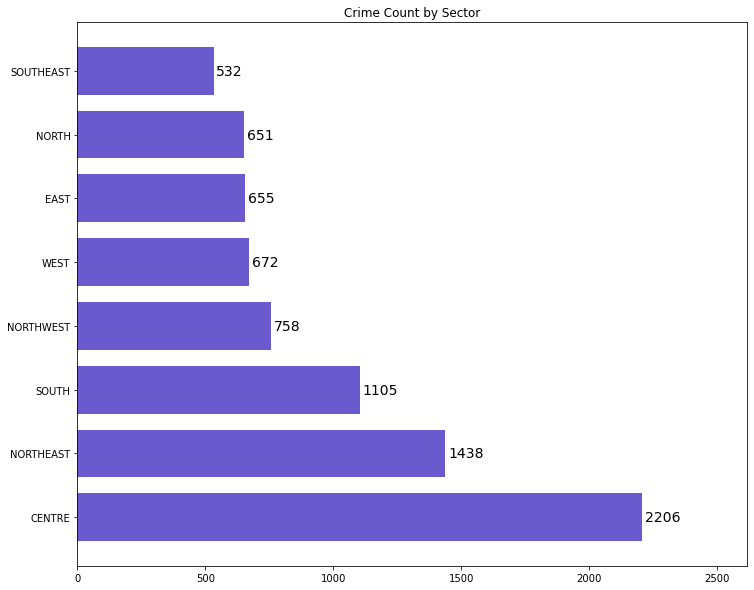

In [31]:
#Crime Count by Sector
y = df_calgary['sector'].value_counts(ascending=False)
fig, ax = plt.subplots(figsize=(12,10))
ax.barh(y.index, y, height=0.75, color="slateblue")
plt.title('Crime Count by Sector')
_, xmax = plt.xlim()
plt.xlim(0, xmax+300)

for i, v in enumerate(y):                   #<--- Add data labels
    ax.text(v + 10, i, str(v), color='black', fontsize=14, ha='left', va='center')

### Sector Comparison 

If we compare the category break down of all sectors,

to the individual sectors we see that the order of crime type by

crime count stays the same. 


It should be noted that compared to other sectors:

* Northeast is more prone to Commercial Robbery
* North and East sectors are more prone to Street Robbery
* South, Northwest and West have noticeably higher rates of Theft FROM Vehicle than other crime types


In [32]:
Centre = df_calgary[df_calgary['sector'] == 'CENTRE']
NE = df_calgary[df_calgary['sector'] == 'NORTHEAST']
S = df_calgary[df_calgary['sector'] == 'SOUTH']
NW = df_calgary[df_calgary['sector'] == 'NORTHWEST']
W = df_calgary[df_calgary['sector'] == 'WEST']
E = df_calgary[df_calgary['sector'] == 'EAST']
N = df_calgary[df_calgary['sector'] == 'NORTH']
SE = df_calgary[df_calgary['sector'] == 'SOUTHEAST']

y1 = Centre['category'].value_counts()
y2 = NE['category'].value_counts()
y3 = S['category'].value_counts()
y4 = NW['category'].value_counts()
y5 = W['category'].value_counts()
y6 = E['category'].value_counts()
y7 = N['category'].value_counts()
y8 = SE['category'].value_counts()

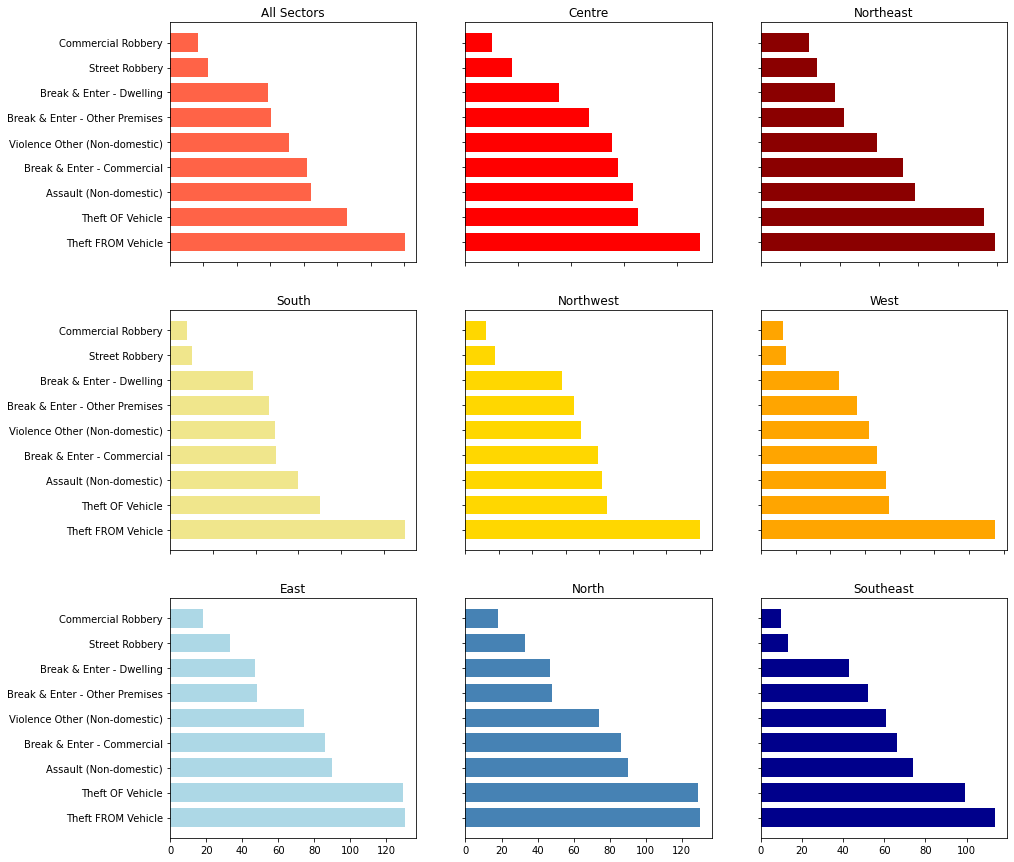

In [33]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))

axs[0, 0].barh(y0.index, y0, height=0.75, color="tomato")
axs[0, 0].set_title('All Sectors')
axs[0, 1].barh( y0.index, y1, height=0.75, color="red")
axs[0, 1].set_title('Centre')
axs[0, 2].barh( y0.index, y2, height=0.75, color="darkred")
axs[0, 2].set_title('Northeast')

axs[1, 0].barh(y0.index, y3, height=0.75, color="khaki")
axs[1, 0].set_title('South')
axs[1, 1].barh( y0.index, y4, height=0.75, color="gold")
axs[1, 1].set_title('Northwest')
axs[1, 2].barh( y0.index, y5, height=0.75, color="orange")
axs[1, 2].set_title('West')

axs[2, 0].barh(y0.index, y6, height=0.75, color="lightblue")
axs[2, 0].set_title('East')
axs[2, 1].barh( y0.index, y6, height=0.75, color="steelblue")
axs[2, 1].set_title('North')
axs[2, 2].barh( y0.index, y8, height=0.75, color="darkblue")
axs[2, 2].set_title('Southeast')

# Hide tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Crime Count by Community

Based on the distribution of the 10 communities with the highest crime count,

I saw a low variation in crime count. I queried for communities that had a crime

count of at least 50; resulting in a community count of 48.

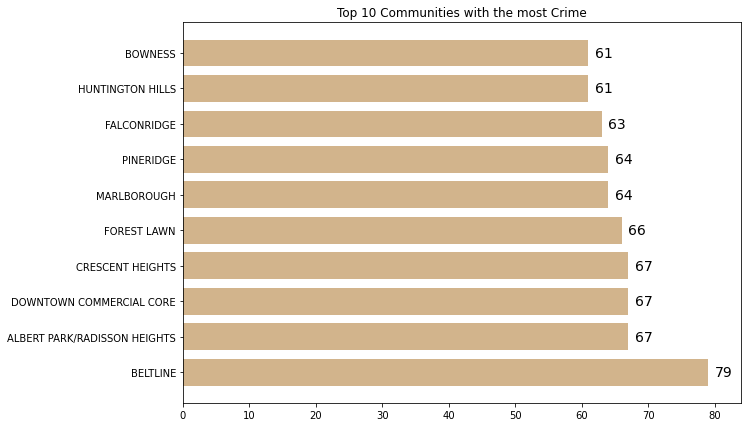

In [34]:
#Crime Count by Community
y = df_calgary['community_name'].value_counts()[:10] #<--- Top 10 Communities with the most crime.

fig, ax = plt.subplots(figsize=(10,7))
ax.barh(y.index, y, height=0.75, color="tan")
plt.title('Top 10 Communities with the most Crime')
_, xmax = plt.xlim()
plt.xlim(0, xmax+1)

for i, v in enumerate(y):                   #<--- Add data labels
    ax.text(v + 1, i, str(v), color='black', fontsize=14, ha='left', va='center')

In [35]:
x = df_calgary['community_name'].value_counts().loc[lambda x : x >= 50].count()
print(x, "Communities have a crime count of at least 50") #So far it shows that

48 Communities have a crime count of at least 50


### Distribution of Community Crimes

Histogram shows a right-skewed distribution.

This is good; most communities in Calgary have a 

low crime range.

Text(0, 0.5, 'Number of Communities')

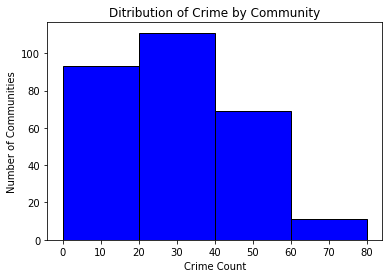

In [37]:
plt.hist(df_calgary['community_name'].value_counts(), color = 'blue', edgecolor = 'black', bins=[0, 20, 40, 60, 80])
plt.title('Ditribution of Crime by Community')
plt.xlabel('Crime Count')
plt.ylabel('Number of Communities')

### Timeline of Crimes

* Dip from January to February
* Increase in crime from February to April
* Crimes plateaus for the month of April
* Increase in crime from May to July
* Decrease in crime from July to September
  

Text(0.5, 1.0, 'Timeline of Crime in Calgary 2021')

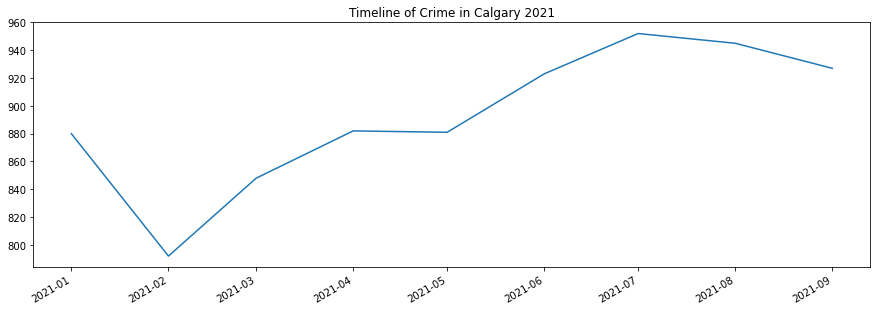

In [39]:
df_calgary['date'].value_counts().plot(figsize=(15,5))
plt.title('Timeline of Crime in Calgary 2021')

### Interactive Geo Map

Crime count looked evenly distributed throughout Calgary.

The 2 most notable locations with higher crime counts were

* Downtown Commercial Core
* Stampede Corral


In [40]:

px.set_mapbox_access_token(map_token)
fig = px.scatter_mapbox(df_calgary, lat="lat", lon="long", color="category", size="crime_count",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10, zoom=10)
fig.show()